# Credit Card Fraud Detection

## Data Exploration

Let's do a quick overview of the data and glance at what exactly are we dealing with.

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [17]:
data = pd.read_csv("creditcard.csv")
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Well! No missing data! That makes things a little easier.

Let's look at the class distribution.

In [11]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Woah! That is a huge class imbalance!

Actually, the credit card transaction dataset is a classic example of class imbalance.

This implies that we cannot approach this dataset the conventional way, just split it into train and test sets, train a classifier and validate it and then test it.

Still, for the sake of understanding, let's go with the conventional approach.

Let's try to train and evaluate a neural network on the whole dataset.

In [28]:
data_train = data.drop(['Class'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(data_train, data['Class'], random_state = 0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
mlpc = MLPClassifier(alpha = 0.1, random_state = 0)
mlpc.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [29]:
accuracy_score(y_test, mlpc.predict(X_test_scaled))

0.99858150051964834

In [30]:
confusion_matrix(y_test, mlpc.predict(X_test_scaled))

array([[71077,     5],
       [   96,    24]], dtype=int64)

Take a look at the class 1 predictions. 96 instances from class 1 (fraudulent) have been wrongly classified as class 0 (safe).

So basically, where we are most interested in capturing fraudulent transactions, the classifier isn't performing well at all. Inspite of an almost-ideal accuracy (99.85%), this model won't do us any good because it'd fail at it's most important objective, capturing the fraudulent transactions.

So, the conventional approach is not going to work here.

# Approach

We'll use the method of under-sampling.

### What exactly is undersampling?

Undersampling is basically taking less number of samples of the class that is represented more. Like in this very case, we have 492 instances of class 1 and 284315 instances of class 0. So, for training our classifier model, we will use very few of 284315 samples from class 1, lets say 500. So, when we create this undersampled dataset consisting of 492 and 500 instances of classes 1 and 0 respectively, we will have a much more uniform distribution and consequently, our classifiers will perform better.

### Why undersampling?

If we do train a classifier model using the original dataset, most algorithms like the K Nearest Neighbors or the Random Forest tend to favor the class with the larger representation, as here is the class 0. This introduces a bias and the classifier will almost ignore the class 1 instances.

### Alternatives to undersampling:

There are many alternatives to undersampling for such class imbalance situations:
1. Oversampling: This is the exact opposite of undersampling. In this method, we add more instances of the under-represented class. This could be done by gathering new data or making copies of the existing data of that class.
2. SMOTE: Synthetic Minority Over-sampling Technique, which basically uses an algorithm, like K Nearest Neighbors, for example, and creates synthetic data instances using this algorithm on the existing instances.

Then there are advanced techniques like MSMOTE (Modified SMOTE) and Adaptive Synthetic Sampling Approach, or the ADASYN algorithm.

# Preprocessing

Let's start with preprocessing the data, i.e. scaling the Amount feature, and getting rid of the unwanted Time feature.

In [18]:
data['scaledAmount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaledAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


# Undersampling

In [24]:
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

We'll take 492 random samples from class 0 instances, so that class distribution will be perfectly uniform among the two classes. It is not necessary to have the same number of instances of both the classes, but for simplicity let us do so.

In [54]:
fraud_length = len(data[data['Class'] == 1])
fraud_indices = np.array(data[data['Class'] == 1].index)
normal_indices = np.array(data[data['Class'] == 0].index)
normal_indices_selected = np.array(np.random.choice(normal_indices,fraud_length, replace = True))
under_sample_indices = np.concatenate([fraud_indices, normal_indices_selected])
data_undersample = data.loc[under_sample_indices, :]
X_undersample = data_undersample.loc[:, data_undersample.columns != 'Class']
y_undersample = data_undersample.loc[:, data_undersample.columns == 'Class']

We have our undersampled dataset ready. Let's try and train a classifier on this dataset.

# Classification using Logistic Regression

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample, y_undersample, test_size = 0.25, random_state = 0)
for c in [0.01, 0.1, 1, 10, 100]:
    logreg = LogisticRegression(C = c, penalty = 'l1')
    logreg.fit(X_train_undersample, y_train_undersample.values.ravel())
    rec = recall_score(logreg.predict(X_test_undersample), y_test_undersample)
    print('Recall for c = %.2f' %c, 'is: %.2f' %rec)

Recall for c = 0.01 is: 0.90
Recall for c = 0.10 is: 0.98
Recall for c = 1.00 is: 0.97
Recall for c = 10.00 is: 0.97
Recall for c = 100.00 is: 0.96


Seems like C = 0.1 is the best model for the undersampled data. Let's investigate this model a little further.

# Performance Evaluation

In [89]:
lr = LogisticRegression(C = 0.1, penalty = 'l1')
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
print(classification_report(lr.predict(X_test_undersample), y_test_undersample))

             precision    recall  f1-score   support

          0       0.98      0.93      0.96       134
          1       0.92      0.98      0.95       112

avg / total       0.96      0.96      0.96       246



Results seem to be great!

Let's try and fit this model to the original data.

In [91]:
lr1 = LogisticRegression(C = 0.1, penalty = 'l1')
lr1.fit(X_train, y_train.values.ravel())
print(classification_report(lr1.predict(X_test), y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71118
          1       0.62      0.88      0.73        84

avg / total       1.00      1.00      1.00     71202



Let's try plotting the ROC curve.

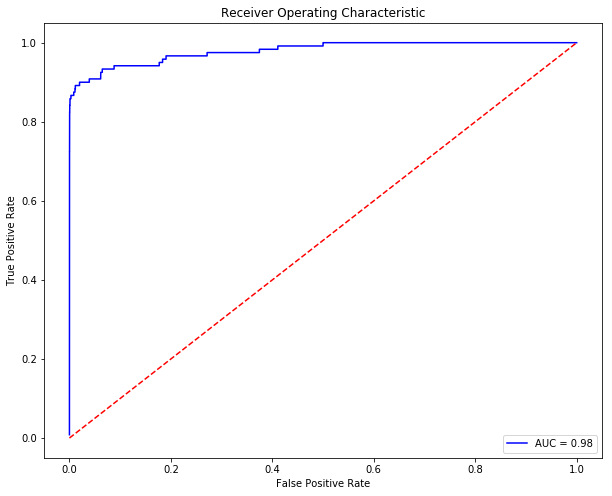

In [104]:
y_pred_score = lr.fit(X_train, y_train.values.ravel()).decision_function(X_test.values)

fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.figure(figsize = (10, 8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Precision-Recall trade off

There usually exists a precision-recall trade off in the evaluation of the performance of a classifier.

We can compute the probability of a particular transaction belonging to the fraudulent class, i.e. class 1. This probability will be, naturally, between 0 and 1. By varying the threshold of this measure, we can control precision and recall.

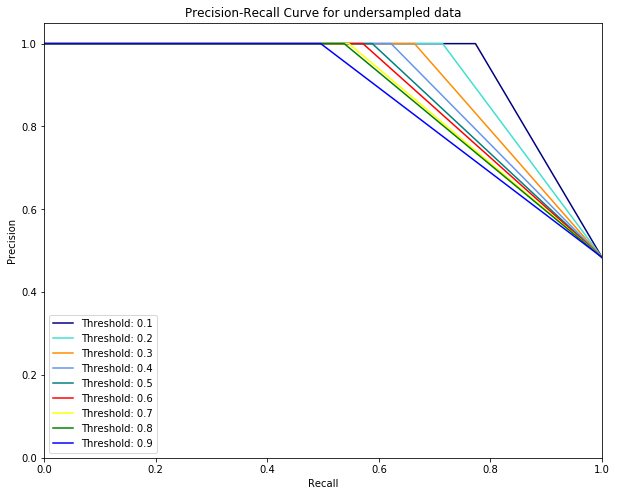

In [118]:
y_pred_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = ['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue']

plt.figure(figsize = (10,8))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_proba[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(y_test_undersample, y_test_predictions_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color, label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve for undersampled data')
    plt.legend(loc="lower left")
plt.show()

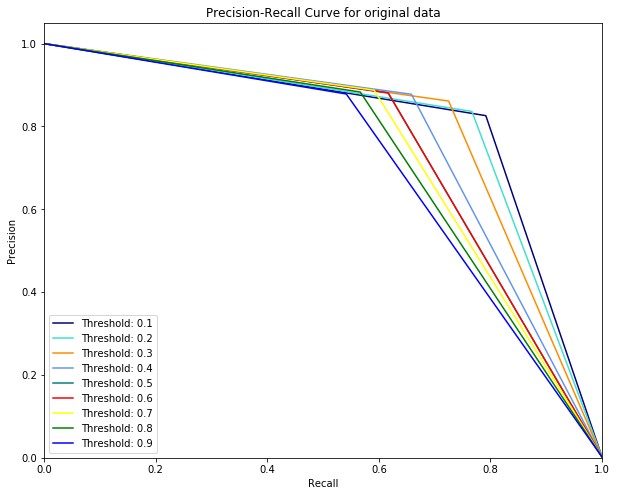

In [119]:
y_pred_proba = lr.predict_proba(X_test.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = ['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue']

plt.figure(figsize = (10,8))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_proba[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_predictions_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color, label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve for original data')
    plt.legend(loc="lower left")
plt.show()

# Conclusion

We have obtained 88% recall accuracy on the whole dataset as compared to the 20% given by the neural network.

Basically, the primary objective which was to capture the fraudulent transactions was successfully completed. But with an increase in recall, comes a decrease in precision and vice versa. There is not perfect model that will yield both 100% recall and precision. Hence, this trade-off will continue to exist and depending on the applications, the particular type of model can be implemented, i.e., recall oriented or precision oriented.